In [132]:
import pandas as pd
import numpy as np


In [133]:
volunteersDictionary = {}
columnsList = [
    "Record Time (Records each 0.5s)",
    "Date (Experiment Date)",
    "Signal level (0 (perfect) -200 (no signal))",
    "Attention (0-100% (maximum attention))",
    "Meditation (0-100% (maximum meditation))",
    "Delta (1-3Hz)",
    "Theta (4-7Hz)",
    "Low Alpha (8-9Hz)",
    "High Alfa (10-12Hz)",
    "Low Beta (13-17Hz)",
    "High Beta (18-30Hz)",
    "Low Gama (31-40Hz)",
    "High Gama (41-50Hz)",
    "RAW EEG (Voltage)",
    "Blink Strength (0-255 (maximum))",
    "Counter (not used)",
    "Average Attention (0-100% (maximum attention))",
    "Counter (not used)",
]
signalsList = [
    "Attention (0-100% (maximum attention))",
    "Meditation (0-100% (maximum meditation))",
    "Delta (1-3Hz)",
    "Theta (4-7Hz)",
    "Low Alpha (8-9Hz)",
    "High Alfa (10-12Hz)",
    "Low Beta (13-17Hz)",
    "High Beta (18-30Hz)",
    "Low Gama (31-40Hz)",
    "High Gama (41-50Hz)",
    "RAW EEG (Voltage)",
    "Blink Strength (0-255 (maximum))"
]
volunteerIndexesList = []


In [134]:
count = 1
while (count < 11):
    key = 'volunteer' + str(count)
    volunteerIndexesList.append(key)
    path = "./ExperimentData/volunteer"
    if count < 10:
        specifier = "0" + str(count) + ".txt"
    elif count == 10:
        specifier = str(count) + ".txt"

    value = pd.read_csv(path + specifier, sep=";")
    value.columns = columnsList
    value.drop("Counter (not used)", axis=1)
    volunteersDictionary[key] = value

    count += 1


In [135]:
def generateSignalStatisticalMeasuresTable(signal):
    volunteersSignalMean = []
    volunteersSignalMax = []
    volunteersSignalStandardDeviation = []

    for volunteer in volunteersDictionary.values():
        volunteersSignalMean.append(volunteer[signal].mean())
        volunteersSignalMax.append(volunteer[signal].max())
        volunteersSignalStandardDeviation.append(
            volunteer[signal].std())

    dataFrame = {}
    meanKey = str(signal) + ' Mean'
    dataFrame[meanKey] = volunteersSignalMean
    maxKey = str(signal) + ' Max'
    dataFrame[maxKey] = volunteersSignalMax
    stdKey = str(signal) + ' Standard Deviation'
    dataFrame[stdKey] = volunteersSignalStandardDeviation

    return pd.DataFrame(dataFrame, index=volunteerIndexesList)


In [136]:
signalTablesList = []

for signal in signalsList:
    signalTablesList.append(generateSignalStatisticalMeasuresTable(signal))


In [137]:
concatenatedSignalsListTable = pd.concat(
    signalTablesList, axis="columns", join="inner"
)
concatenatedSignalsListTable


,Attention (0-100% (maximum attention)) Mean,Attention (0-100% (maximum attention)) Max,Attention (0-100% (maximum attention)) Standard Deviation,Meditation (0-100% (maximum meditation)) Mean,Meditation (0-100% (maximum meditation)) Max,Meditation (0-100% (maximum meditation)) Standard Deviation,Delta (1-3Hz) Mean,Delta (1-3Hz) Max,Delta (1-3Hz) Standard Deviation,Theta (4-7Hz) Mean,...,Low Gama (31-40Hz) Standard Deviation,High Gama (41-50Hz) Mean,High Gama (41-50Hz) Max,High Gama (41-50Hz) Standard Deviation,RAW EEG (Voltage) Mean,RAW EEG (Voltage) Max,RAW EEG (Voltage) Standard Deviation,Blink Strength (0-255 (maximum)) Mean,Blink Strength (0-255 (maximum)) Max,Blink Strength (0-255 (maximum)) Standard Deviation
volunteer1,43.233607,100,18.891904,63.254098,97,13.074690,371925.721311,2907504,540681.052103,95468.520492,...,11274.705962,3684.422131,40093,5392.670591,54.807377,803,146.639559,46.172131,113,12.612093
volunteer2,40.028807,81,16.218396,57.057613,100,16.441631,336793.493827,1789103,432440.645060,87879.786008,...,4860.083889,2547.218107,17222,2688.184606,45.353909,404,105.224348,42.144033,84,7.747023
volunteer3,56.329218,100,18.392154,73.283951,100,13.182979,152216.102881,1294561,245572.596625,51065.897119,...,4962.178049,2928.629630,18533,3295.186497,59.518519,371,86.066010,33.864198,38,3.179557
volunteer4,59.807377,97,19.717756,68.372951,100,18.213081,397858.954918,2458934,540331.058890,102967.655738,...,5451.203149,2905.045082,19462,3401.330684,41.073770,667,158.808354,43.778689,210,19.666986
volunteer5,43.192623,84,15.868797,62.077869,96,15.446112,211417.860656,1660286,303391.784401,57012.831967,...,7468.092284,1999.622951,21747,3345.351286,57.733607,539,116.149005,39.446721,58,5.396351
volunteer6,45.336066,88,18.351219,63.049180,100,16.840258,139245.348361,1174934,194454.592325,44566.319672,...,2397.605119,1397.762295,8048,1399.334681,57.963115,329,73.103700,39.733607,50,5.465825
volunteer7,45.881148,94,16.980448,55.504098,81,12.977504,208176.614754,2102791,389248.558856,55262.946721,...,4470.097902,1642.606557,13256,2238.896557,58.340164,379,85.695239,36.028689,43,4.224560
volunteer8,41.176230,100,23.743262,57.524590,100,21.850677,146536.889344,1818586,244343.864795,39350.122951,...,2477.614609,1462.061475,13503,1862.338174,56.073770,343,72.303848,29.008197,43,15.358271
volunteer9,46.893443,96,15.859884,68.069672,100,15.907631,219501.405738,2465973,409834.945784,53475.643443,...,2613.042738,4796.163934,46513,6930.348460,50.299180,343,81.024082,38.315574,46,2.966688
volunteer10,49.077869,100,23.626163,31.963115,78,16.450533,123860.975410,854009,156395.709752,35712.192623,...,2376.894579,8463.372951,68095,13452.271666,60.118852,657,71.119836,63.823770,203,76.981945


In [138]:
import camelot


In [139]:
dataVideoValuesTable = camelot.read_pdf("05_DataVideoValues.pdf")


In [140]:
print("Total tables extracted:", dataVideoValuesTable.n)


Total tables extracted: 1


In [141]:
print(dataVideoValuesTable[0].df)


       0                1               2               3  \
0     id             name  Valence \nRank  Arousal \nRank   
1   9446  ACCEDE09446.mp4            9312            8547   
2   5522  ACCEDE05522.mp4            9241            9201   
3   9160  ACCEDE09160.mp4            9758            8301   
4   7901  ACCEDE07901.mp4            9329            8863   
5   4975  ACCEDE04975.mp4            9349            8935   
6   8486  ACCEDE08486.mp4            9423            7720   
7   7272  ACCEDE07272.mp4            9475            8061   
8   1188  ACCEDE01188.mp4            9500            9080   
9   9022  ACCEDE09022.mp4            9652            7874   
10  6716  ACCEDE06716.mp4            9768            7965   
11  6625  ACCEDE06625.mp4            9660            7684   
12  6618  ACCEDE06618.mp4            9760            9713   
13  1362  ACCEDE01362.mp4            9657            9235   

                              4            5                   6  \
0   Valence Valu

In [142]:
dataVideoValuesTable[0].to_csv("DataVideoValues.csv")


In [143]:
dataVideoValues = pd.read_csv("DataVideoValues.csv", index_col=0)
dataVideoValues


,name,Valence \nRank,Arousal \nRank,Valence Value Arousal Value,Unnamed: 5,Valence \nVariance,Arousal \nVariance
id,,,,,,,
9446,ACCEDE09446.mp4,9312,8547,3.522513,3.814269,0.131342,0.142225
5522,ACCEDE05522.mp4,9241,9201,3.512980,4.183311,0.127613,0.171842
9160,ACCEDE09160.mp4,9758,8301,3.587641,3.682005,0.160976,0.136876
7901,ACCEDE07901.mp4,9329,8863,3.524828,3.989423,0.132275,0.153715
4975,ACCEDE04975.mp4,9349,8935,3.527569,4.030158,0.133394,0.157076
8486,ACCEDE08486.mp4,9423,7720,3.537864,3.383838,0.137721,0.134816
7272,ACCEDE07272.mp4,9475,8061,3.545247,3.556417,0.140939,0.134423
1188,ACCEDE01188.mp4,9500,9080,3.548840,4.113125,0.142538,0.164673
9022,ACCEDE09022.mp4,9652,7874,3.571317,3.460925,0.152978,0.134148


In [144]:
dataVideoValues.rename(
    columns={
        'Valence \nRank': 'Valence Rank', 'Arousal \nRank': 'Arousal Rank', 'Valence Value Arousal Value': 'Valence Value',
        'Unnamed: 5': 'Arousal Value', 'Valence \nVariance': 'Valence Variance', 'Arousal \nVariance': 'Arousal Variance'
    },
    inplace=True
)



In [145]:
dataVideoValues

,name,Valence Rank,Arousal Rank,Valence Value,Arousal Value,Valence Variance,Arousal Variance
id,,,,,,,
9446,ACCEDE09446.mp4,9312,8547,3.522513,3.814269,0.131342,0.142225
5522,ACCEDE05522.mp4,9241,9201,3.512980,4.183311,0.127613,0.171842
9160,ACCEDE09160.mp4,9758,8301,3.587641,3.682005,0.160976,0.136876
7901,ACCEDE07901.mp4,9329,8863,3.524828,3.989423,0.132275,0.153715
4975,ACCEDE04975.mp4,9349,8935,3.527569,4.030158,0.133394,0.157076
8486,ACCEDE08486.mp4,9423,7720,3.537864,3.383838,0.137721,0.134816
7272,ACCEDE07272.mp4,9475,8061,3.545247,3.556417,0.140939,0.134423
1188,ACCEDE01188.mp4,9500,9080,3.548840,4.113125,0.142538,0.164673
9022,ACCEDE09022.mp4,9652,7874,3.571317,3.460925,0.152978,0.134148


<AxesSubplot: xlabel='id'>

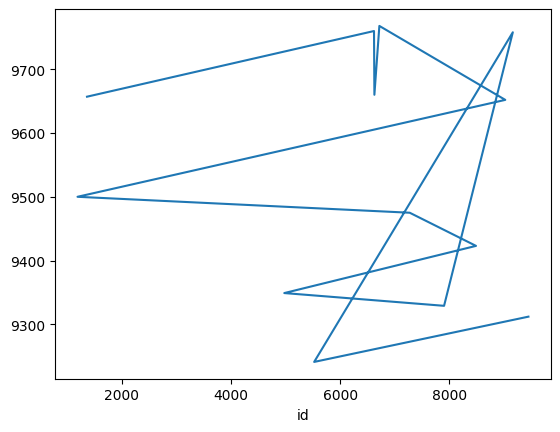

In [149]:
dataVideoValues["Valence Rank"].plot()


<AxesSubplot: >

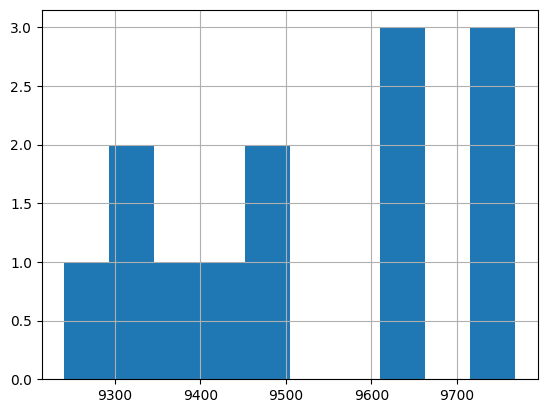

In [153]:
dataVideoValues["Valence Rank"].hist()


<AxesSubplot: xlabel='id'>

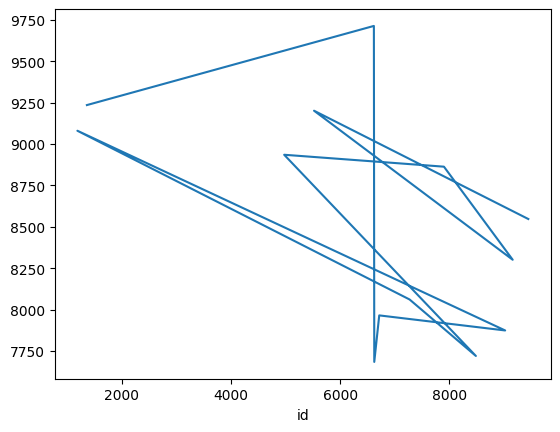

In [152]:
dataVideoValues["Arousal Rank"].plot()


<AxesSubplot: >

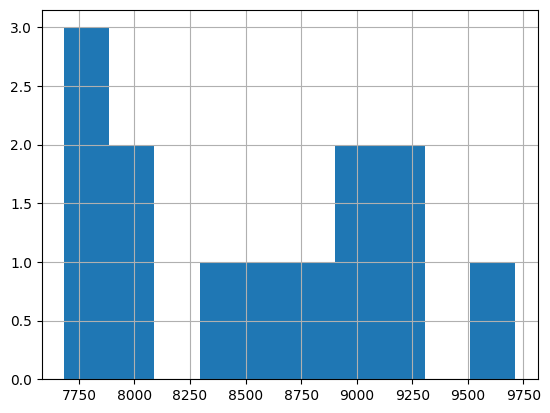

In [154]:
dataVideoValues["Arousal Rank"].hist()
